# Task 2 - Donald Trump's tweets

**congratulations!** You have been hired by Donald John Trump as a personal analyst. He has a few missions for you. However, he doesn't like to share a lot of information about himself... So you'll have to answer all his questions using his Tweets on Twitter.
![alt text](https://cdn.pixabay.com/photo/2017/01/24/13/02/donald-trump-2005343_1280.png "Donald Trump")
### Loading the data
First, load the data you've received:
- Remove any blank rows (where all the values are missing).
- Treat every missing numeric value as zero and every missing textual value as blank string.
- Set the type of every column to the best fitting (int, float, category, date, boolean, etc.)

1. Generate a pie chart showing in which platform Trump is twitting (Android, iPhone, etc). Ignore platforms from which he used less than 10 times. Also, if you see some weird named platforms that look like a mistake - remove them too. Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.
2. Trump wants his tweets to be viral. He is asking you to check at what time of the day his tweets get the most retweets (shares) and the most favorite (likes). The time spans to compare is every round hour (i.e. 00:00-01:00, 01:00-02:00, etc). Show this data in a bar chart. Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.
3. Generate another bar chart showing when does trump really tweets, to understand if he is doing it well or not. (Can you assume how many hours a day does Trump sleep?). Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.
4. Trump also wants to know whether he should do long tweets or short ones. Do another bar plot of number of retweets and favorite based on the tweets length (Do it twice: once for the time **before** Trump got elected, and once **after** he got elected):
  * **Very short**: len < 70
  * **Short**: 70 <= len < 110
  * **Medium**: 110 <= len < 130
  * **Long**: 130 <= len < 140
  * **Very long**: 140 <= len
5. Generate a pie chart showing how Trump's tweets really are distributed between these categories. Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.
6. Generate a plot showing Trump's usage of Android and of iPhone over time. It should be two line plots one over the other when one shows the iPhone usage and the other shows the Android usage.
7. Trump has a theory that people tend to retweet him much more on rainy days than on dry days. Check if that is true and show it on a visual. For that you have another file with the weather details per day in Washington DC. The definition of a rainy day is when the precipitation is more than 0.05.

## Good luck!
![alt text](https://cdn.pixabay.com/photo/2017/01/31/19/15/cartoon-2026571_1280.png "Donald Trump")


In [3]:
#imported the packs I needed so I can work on the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Opened and cleaned the dataframe
trump_tweets = pd.read_csv("trump_tweets.csv")
trump_tweets.dropna(how = "all",inplace=True)
trump_tweets.columns = trump_tweets.columns.str.strip()

In [5]:
#droping the unessential NaN values.
trump_tweets["favorite_count"] = trump_tweets["favorite_count"].fillna(0).replace("false",0)
trump_tweets["source"] = trump_tweets["source"].fillna("")
trump_tweets["text"] = trump_tweets["text"].fillna("")
trump_tweets["retweet_count"] = trump_tweets["retweet_count"].fillna(0)
trump_tweets["id_str"] = trump_tweets["id_str"].fillna("")

In [6]:
#Makeing all the variubales in thier right form.
trump_tweets["created_at"]= pd.to_datetime(trump_tweets["created_at"])
trump_tweets["favorite_count"] = trump_tweets["favorite_count"].astype("int")
trump_tweets["is_retweet"] = trump_tweets["is_retweet"].astype("bool")

In [7]:
trump_tweets.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [8]:
#checing the index of the unessential words
bad = trump_tweets["source"].str.contains("Twitter for Websites" ) 
trump_tweets["source"][bad]


20582    Twitter for Websites
Name: source, dtype: object

In [9]:
#Dropind all the rows I didnt need.
trump_tweets.drop(13033,inplace=True)  
trump_tweets.drop(34277,inplace=True)  
trump_tweets.drop(20582,inplace=True)
trump_tweets.drop(13041,inplace=True) 
trump_tweets.drop(13037,inplace=True)
trump_tweets.drop(17116,inplace=True)  
trump_tweets.drop(17117,inplace=True)  
trump_tweets.drop(17123,inplace=True)  
trump_tweets.drop(17113,inplace=True)  
trump_tweets.drop(16648,inplace=True)  
trump_tweets.drop(34252,inplace=True)  
trump_tweets.drop(34128,inplace=True)  
trump_tweets.drop(34276,inplace=True)  
trump_tweets.drop(13034,inplace=True)    
trump_tweets.drop(13035,inplace=True)  
trump_tweets.drop(13036,inplace=True) 
trump_tweets.drop(13038,inplace=True) 
trump_tweets.drop(13039,inplace=True)
trump_tweets.drop(13040,inplace=True)
trump_tweets.drop(13042,inplace=True) 
trump_tweets.drop(13043,inplace=True)    
trump_tweets.drop(7523,inplace=True)
trump_tweets.drop(11676,inplace=True)
trump_tweets.drop(12928,inplace=True)
trump_tweets.drop(13248,inplace=True)
trump_tweets.drop(13413,inplace=True)
trump_tweets.drop(14560,inplace=True)
trump_tweets.drop(14584,inplace=True)
trump_tweets.drop(23858,inplace=True)
trump_tweets.drop(24697,inplace=True)
trump_tweets.drop(24985,inplace=True)
trump_tweets.drop(25246,inplace=True)
trump_tweets.drop(25430,inplace=True)
trump_tweets.drop(25540,inplace=True)
trump_tweets.drop(25654,inplace=True)
trump_tweets.drop(25705,inplace=True)

In [10]:
#Checking that I have no value lower then 10
trump_tweets["source"].value_counts()

Twitter for Android       12898
Twitter Web Client        11241
Twitter for iPhone         8881
TweetDeck                   476
TwitLonger Beta             334
Media Studio                154
Instagram                   127
Facebook                     98
Twitter Ads                  97
Twitter for BlackBerry       87
Twitter for iPad             57
Mobile Web (M5)              55
Twitter Media Studio         32
Twitlonger                   21
Name: source, dtype: int64

In [11]:
trump_tweets

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @realDonaldTrump: WE WILL NEVER FORGET! htt...,2019-04-13 16:01:11,69709.0,0,True,1.1171e+18
1,Twitter for iPhone,Why should Radical Left Democrats in Congress ...,2019-04-13 12:21:05,27460.0,103713,True,1.11704e+18
2,Twitter for iPhone,....extraordinary growth economic success and ...,2019-04-13 12:04:18,15035.0,70792,True,1.11704e+18
3,Twitter for iPhone,I agree with Kim Jong Un of North Korea that o...,2019-04-13 11:54:45,17405.0,79877,True,1.11703e+18
4,Twitter for iPhone,In New York State Democrats blocked a Bill exp...,2019-04-13 03:51:00,31263.0,105245,True,1.11691e+18
...,...,...,...,...,...,...,...
34589,Twitter Web Client,Superbowl Sunday is a great American tradition...,2010-02-07 16:54:42,16.0,3,True,8.77049e+09
34590,Twitter Web Client,Golf Channel & Donald Trump's World of Golf ho...,2010-01-22 20:51:00,12.0,1,True,8.08387e+09
34591,Twitter Web Client,"from Donald Trump: ""I saw Lady Gaga last night...",2010-01-21 16:58:43,3813.0,3223,True,8.03375e+09
34592,Twitter Web Client,Trump Tycoon App for iPhone & iPod Touch - It'...,2010-01-15 16:28:02,23.0,20,True,7.79303e+09


In [12]:
#1
#setting time masks before election and after.
date_str3 = "11-8-2016"
date_dt = pd.datetime.strptime(date_str3, '%m-%d-%Y')
after_elected = trump_tweets["created_at"] > date_dt
before_elected= trump_tweets["created_at"] < date_dt

'According to this chart the source used the most is Android ,before Trump got elected'

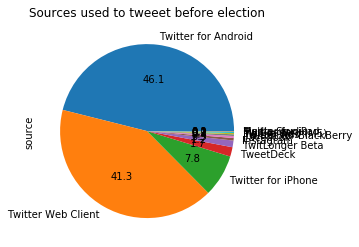

In [67]:
#A pie chart that showing the sources used to tweeet before election
trump_tweets["source"][before_elected].value_counts().plot(kind="pie",autopct="%.1f")
plt.title("Sources used to tweeet before election")
("According to this chart the source used the most is Android ,before Trump got elected")

'According to this chart the source used the most is iPhone, after Trump got elected'

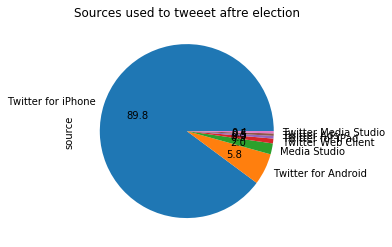

In [68]:
#A pie chart that showing the sources used to tweeet before election
trump_tweets["source"][after_elected].value_counts().plot(kind="pie",autopct="%.1f")
plt.title("Sources used to tweeet aftre election")
("According to this chart the source used the most is iPhone, after Trump got elected")

In [15]:
#2
#create adata frame for the time before election.
tweets_before = trump_tweets[before_elected]

In [16]:
#create groups of hours of the day
hours_before = tweets_before.created_at.dt.hour
hours_before = tweets_before.groupby(hours_before)

Acording to the table at 22:00 his tweet's 
 Are most retweeted and liked before Trump got elected


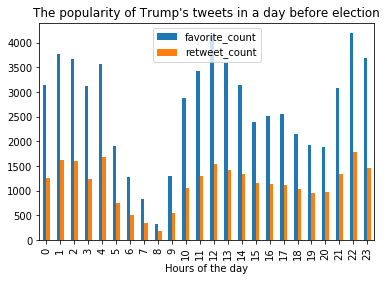

In [69]:
#A bar chart showing what time a day his tweets were most retweeted and liked before election.
hours_before.agg({"favorite_count":"mean","retweet_count":"mean"}).plot(kind = "bar")
plt.xlabel("Hours of the day")
plt.title("The popularity of Trump\'s tweets in a day before election")
print("Acording to the table at 22:00 his tweet\'s \n Are most retweeted and liked before Trump got elected")

In [18]:
#create adata frame for the time after election.
tweets_after = trump_tweets[after_elected]

In [19]:
#create groupby for hours afer the election.
hours_after = tweets_after.created_at.dt.hour
hours_after = tweets_after.groupby(hours_after)

Acording to the table at 12:00 his tweet's 
 Are most retweeted and liked after Trump got elected


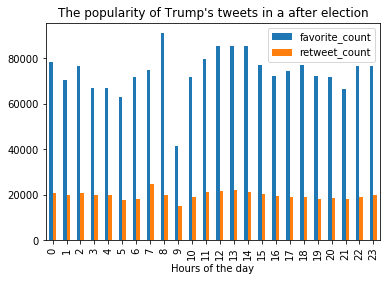

In [70]:
#A bar chart showing what time a day his tweets were most retweeted and liked after election.
hours_after.agg({"favorite_count":"mean","retweet_count":"mean"}).plot(kind = "bar")
plt.xlabel("Hours of the day")
plt.title("The popularity of Trump\'s tweets in a after election")
print("Acording to the table at 12:00 his tweet\'s \n Are most retweeted and liked after Trump got elected")

As the chart show Trump really tweets at night.
 I assume Trump sleeps between 4am to 10am before he got elected.


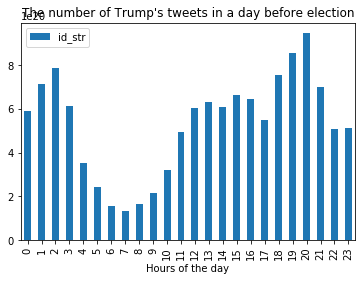

In [71]:
#3
hours_before.agg({"id_str":"sum"}).plot(kind = "bar")
plt.xlabel("Hours of the day")
plt.title("The number of Trump\'s tweets in a day before election")
print("As the chart show Trump really tweets at night.\n I assume Trump sleeps between 4am to 10am before he got elected.")

As the chart show Trump really tweets at noon.
 I assume he sleeps between 4am to 9am after he got elected.


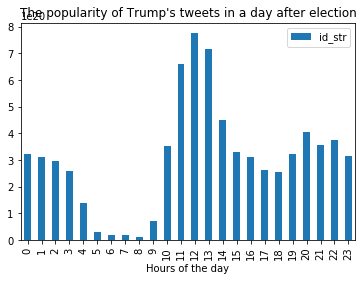

In [56]:
hours_after.agg({"id_str":"sum"}).plot(kind = "bar")
plt.xlabel("Hours of the day")
plt.title("The popularity of Trump\'s tweets in a day after election")
print("As the chart show Trump really tweets at noon.\n I assume Trump sleeps between 4am to 9am after he got elected.")

In [24]:
#4
#calculte the len of a tweet
length_of_tweet = [float(len(x)) for x in trump_tweets["text"]]
#creating the culom of length
trump_tweets["length"] = length_of_tweet
#Fumction that sets the tweet length by title.
def Show_length(i):
    if i < 70:
        return ("Very_short") 
    elif 70 <= i < 110:
        return ("Short")
    elif 110 <= i < 130:
        return "Medium"  
    elif  130 <= i < 140 :
        return ("Long") 
    elif 140 <= i:
        return ("Very_long") 
#setting the colum as its title.
trump_tweets["length"]= trump_tweets["length"].apply(Show_length)
tweets_before = trump_tweets[before_elected]
tweets_after = trump_tweets[after_elected]

In [25]:
#create groups of length before election
length_before_election = tweets_before.groupby("length")

According to the chart before Trump got elected, the best tweets were long ones 


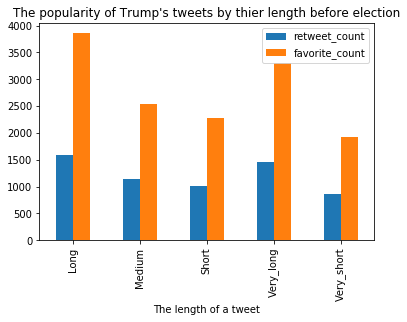

In [72]:
#A bar chart showing popularity of a tweet by length before election
length_before_election.agg({"retweet_count":"mean","favorite_count":"mean"}).plot(kind = "bar")
plt.xlabel("The length of a tweet")
plt.title("The popularity of Trump\'s tweets by thier length before election")
print("According to the chart before Trump got elected, the best tweets were long ones ")

In [30]:
#showing length column as a series
length_before_election = tweets_before.groupby("length")
length_before_election1 = length_before_election.text.agg("count")
length_before_election1

length
Long          7729
Medium        5582
Short         6833
Very_long     2635
Very_short    4253
Name: text, dtype: int64

In [31]:
#create groups of length after election
length_after_election =tweets_after.groupby("length")

According to the chart after Trump got elected, the best tweets were very long ones 


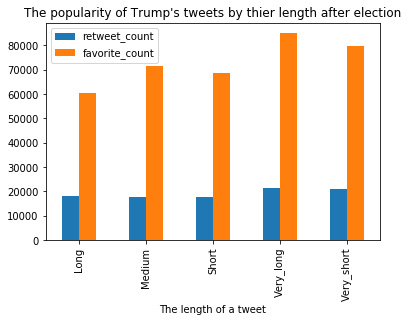

In [73]:
#A bar chart showing popularity of a tweet by length after election
length_after_election.agg({"retweet_count":"mean","favorite_count":"mean"}).plot(kind = "bar")
plt.xlabel("The length of a tweet")
plt.title("The popularity of Trump\'s tweets by thier length after election")
print("According to the chart after Trump got elected, the best tweets were very long ones ")

This chart shows the way the length of Trump's tweets distribut before he got elected


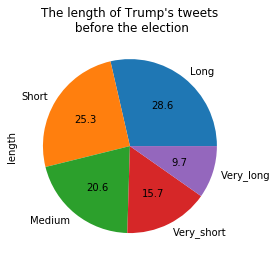

In [74]:
#5
# A pie Chart that shows the division of tweets by length before election
tweets_before["length"].value_counts().plot(kind="pie",autopct="%.1f")
plt.title("The length of Trump\'s tweets\n before the election")
print("This chart shows the way the length of Trump\'s tweets distribut before he got elected")

This chart shows the way the length of Trump's tweets distribut after he got elected


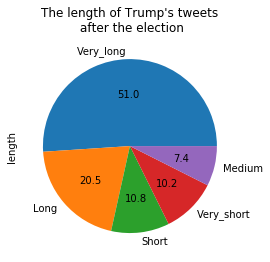

In [75]:
# A pie Chart that shows the division of tweets by length before election
trump_tweets["length"][after_elected].value_counts().plot(kind="pie",autopct="%.1f")
plt.title("The length of Trump\'s tweets\n after the election")
print("This chart shows the way the length of Trump\'s tweets distribut after he got elected")

In [35]:
# I created two cloumns one for android use and one for iPhone use
Android = trump_tweets["source"].str.contains("Twitter for Android")
iPhone = trump_tweets["source"].str.contains("Twitter for iPhone")

In [36]:
#functioun that make the name android and iPhone in to numbers.
def change(i):
    if i == "Twitter for Android":
        return 1
    if i == "Twitter for iPhone":
        return 2
#updateing the columns.
trump_tweets["Android"] = trump_tweets["source"][Android].apply(change) 
trump_tweets["iPhone"] = trump_tweets["source"][iPhone].apply(change)

In [37]:
# Create groups of sources.
source_group = trump_tweets.groupby("source")

In [38]:
# Create the mask of years.
over_time = trump_tweets.created_at.dt.year
over_time = trump_tweets.groupby(over_time)

According to this chart at the begining people retweets through iPhone more. 
 In the end Android as the bigger amount of retweets.  


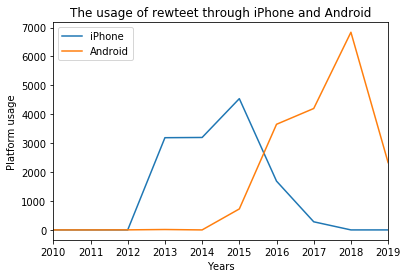

In [76]:
over_time.agg({"Android":"sum","iPhone":"sum"}).plot.line()
plt.legend(['iPhone', 'Android'])
plt.ylabel('Platform usage')
plt.xlabel('Years')
plt.title('The usage of rewteet through iPhone and Android')
print("According to this chart at the begining people retweets through iPhone more. \n In the end Android as the bigger amount of retweets.  ")

In [40]:
#7
#Read the file and clean it up
temp = pd.read_csv("weather_washington_dc.csv")
temp.columns = temp.columns.str.strip().dropna(how="any")

In [41]:
# Changeing the coulmn into dates only
trump_tweets['publish_day'] = [d.date() for d in trump_tweets['created_at']]
# Creating new Column in trump_tweets dataframe similar to the one in temp
trump_tweets['publish_day'] = pd.to_datetime(trump_tweets['publish_day'])
# Using only the relevant columns in temp dataframe.
temp = temp[["DATE","PRCP"]]
temp["DATE"] = pd.to_datetime(temp['DATE'])
# changed DATE column name so it would be easyer to merge both dataframe .
temp.rename({"DATE": "publish_day"}, axis='columns', inplace=True)

In [42]:
# Took from the trump tweets datafrae only the coulmns I need.
pop_year = trump_tweets[["publish_day", "retweet_count"]]
pop_year = pop_year.reset_index(drop=True)


In [43]:
# Merged between the two dataframes.
pop_weather = pop_year.merge(temp, how="inner", on = "publish_day")
pop_weather["retweet_count"] = pop_weather["retweet_count"].drop_duplicates()
pop_weather = pop_weather.dropna(how ="any")

In [44]:
# Maed group of PRCP.
prcp_group = pop_weather.groupby('PRCP')

In [45]:
# Created a function that recive a number and return "A rainy" / "Not rainy".
#then i applyed the function on the prcp groupby.
#i add the result as a new coulmn to my new data.
def rainy_days(n):
    if n > 0.05:
        return "A rainy day"
    else:
        return "Not a rainy day"


rainy_or_not = pop_weather["PRCP"].apply(rainy_days)
rainy_or_not = rainy_or_not.rename("rainy_or_not")

pop_weather = pd.concat([pop_weather.reset_index(drop=True), rainy_or_not.reset_index(drop=True)], axis=1)

According to this chart people retweeted more in days that werent rainy.
 But only by a small amount


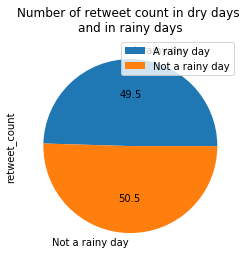

In [77]:
#the final plot - i groupby the coulmn of "rainy or not" and check the count of the retweets in each one of the groups.
rainy_group = pop_weather.groupby("rainy_or_not")
rainy_group = rainy_group.agg({"retweet_count": "mean"})
rainy_group.plot(kind="pie", subplots=True,autopct="%.1f")
plt.title("Number of retweet count in dry days \n""and in rainy days")
print("According to this chart people retweeted more in days that werent rainy.\n But only by a small amount")